**Упражнение 1.2**

  Скачайте с сайта https://freesound.org/ обрзец звука, включающий музыку, речь или иные звуки, имеющие четко выраженную высоту. Выделите примерно полусекундный сегмент, в котором высота постоянна. Вычислите и распечатайте спектр выбранного сегмента. Как связанны тембр звука и гармоническая структура, видимая в спепктре?

  Используйте high_pass, low_pass и band_stop для фильтрации тех или иных гармоник. Затем преобразуйте спектры обратно в сигнал и прослушайте его. Как звук соотносится с изменениями, сделанными в спектре?

In [33]:
#get thinkdsp.py
import os
!pip install wget
if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

Для рассмотрения был выбран звук пианино. Рассмотрим его график

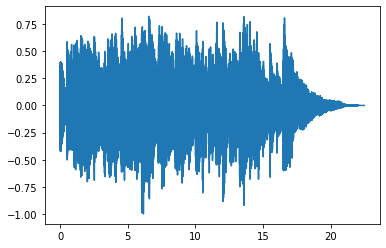

In [8]:
from thinkdsp import read_wave
wave = read_wave('sound_piano.wav')
wave.normalize()
wave.make_audio()
wave.plot()

Для нашей дальнейшей работы подойдет промежуток от 0 до 0,1 с. Создаим для него отдельный сегмент

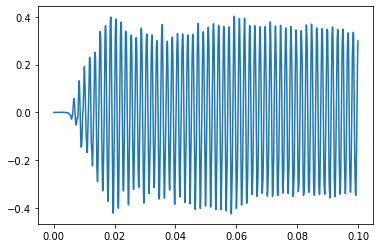

In [10]:
segment = wave.segment(start=0, duration=0.1)
segment.make_audio()
segment.plot()

Далее проанализируем спектр полученного сегмента

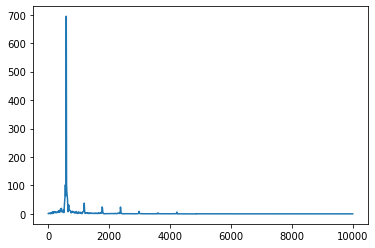

In [11]:
spectrum = segment.make_spectrum()
spectrum.plot(high=10000)

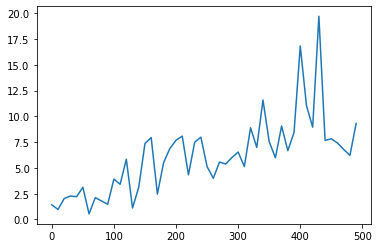

In [12]:
spectrum.plot(high=500)

In [13]:
spectrum.peaks()[:30]

[(694.4514811464849, 590.0),
 (102.34417430718831, 560.0),
 (101.93369214835131, 580.0),
 (101.5209307484646, 600.0),
 (75.98151831069804, 610.0),
 (66.06626799354603, 620.0),
 (63.27292837099, 570.0),
 (62.32344150944324, 550.0),
 (53.22182236130749, 630.0),
 (49.538276094964694, 540.0),
 (37.831175972692996, 1180.0),
 (34.187218605486294, 530.0),
 (31.551969786679027, 670.0),
 (24.765766810071536, 640.0),
 (24.524047687589526, 1770.0),
 (24.19382622938652, 2370.0),
 (19.715616618039622, 430.0),
 (17.57515249733664, 1780.0),
 (16.835305202091394, 400.0),
 (15.366964798262574, 660.0),
 (15.155273224189258, 520.0),
 (15.10294654045105, 500.0),
 (14.539682362844236, 680.0),
 (14.132165058739766, 690.0),
 (13.076967511481712, 1190.0),
 (12.987225434640418, 700.0),
 (12.227050121826275, 1170.0),
 (11.78626657706284, 720.0),
 (11.589438736787958, 340.0),
 (11.559304094803329, 710.0)]

Из полученной информации можно наблюдать пики: 1770, 1780 и 2370 Гц.
Сам тебр звука зависит от соотношения громкости частотных тонов (как и от разнообразного наличия этих самых тонов), а также от присутсвия/отсутсвия в спектре звучания основного тона.

Для фильтрации гармоник воспользуемся методами high_pass, bass_pass и band_stop.

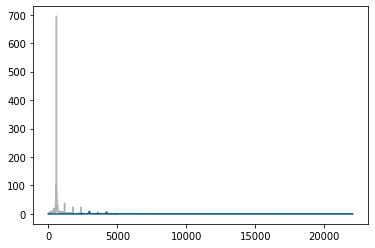

In [15]:
#high_pass
import matplotlib.pyplot as plt
from IPython.display import display

spectrum = segment.make_spectrum()
spectrum.plot(color='0.7')
spectrum.high_pass(2400)
spectrum.plot(color='#045a8d')
plt.show()

audio = spectrum.make_wave().make_audio()
display(audio)

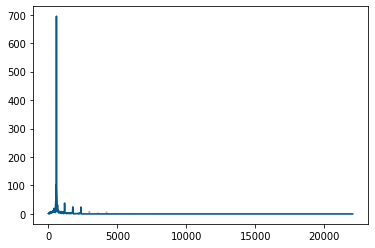

In [16]:
#low_pass
spectrum = segment.make_spectrum()
spectrum.plot(color='0.7')
spectrum.low_pass(2400)
spectrum.plot(color='#045a8d')
plt.show()

audio = spectrum.make_wave().make_audio()
display(audio)

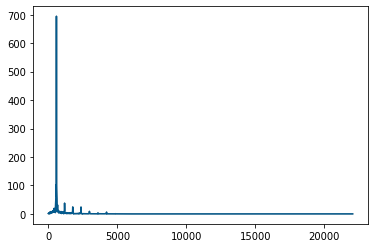

In [17]:
#band_stop
spectrum = segment.make_spectrum()
spectrum.plot(color='0.7')
spectrum.band_stop(4500, 10000)
spectrum.plot(color='#045a8d')
plt.show()

audio = spectrum.make_wave().make_audio()
display(audio)

Из полученных результатов можно сделать вывод, что high_pass необходим для среза частот выше указанного значения, low_pass - для среза частот ниже указанного значения, а band_stop для среза частот в указанном промежутке.

**Упражнение 1.3**

Создайте сложный сигнал из объектов SinSignal и CosSignal суммируя их. Обработайте сигнал для получения wave и прослушайте его. Вычислите Spectrum и распечатайте. Что произойдёт при добавлении частотных компонент, не кратных основным?

In [21]:
from thinkdsp import CosSignal, SinSignal
from IPython.display import Audio

cos_sig = (CosSignal(freq=220, amp=2.0, offset=0) +
           CosSignal(freq=880, amp=1.0, offset=0))
sin_sig = (SinSignal(freq=550, amp=0.5, offset=1.5) +
           SinSignal(freq=1100, amp=1.5, offset=1.5))

mix = sin_sig + cos_sig
wave = mix.make_wave(duration=2, start=0, framerate=11025)
wave.make_audio()

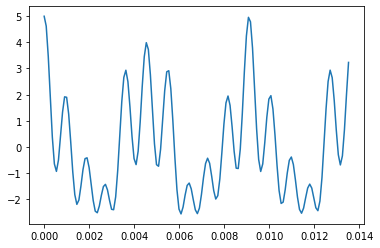

In [22]:
mix.plot()

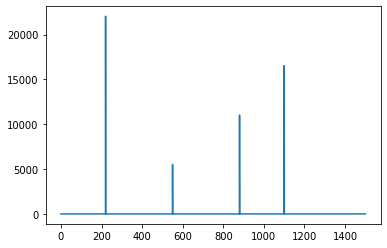

In [23]:
spectrum = wave.make_spectrum()
spectrum.plot(high=1500)

Теперь добавим частоту, которая будет не кратна основным.

In [24]:
mix += SinSignal(freq=484)
mix.make_wave().make_audio()

После добавления данной частоты слышен посторонний звук, т.е. изменился тембр.

**Упражнение 1.4**

Напишите функцию stretch, берущую wave и коэффициент изменения. Она должна ускорять или замедлять сигнал изменением ts и framerate. Подсказка: должно получиться всего две строки кода.

Напишу оба варианта функции. При увеличении в coeff ts и уменьшении в этот же коэффициент framerate звук будет замедляться, а при обратном алгоритме - ускоряться.

Напишем необходимые функции и проверим их на имеющемся звуке игры на пианино.

In [25]:
def stretch_slower(wave, factor):
  wave.ts *= factor
  wave.framerate /= factor

def stretch_faster(wave, factor):
  wave.ts /= factor
  wave.framerate *= factor

In [29]:
wave = read_wave('sound_piano.wav')
wave.normalize()
wave.make_audio()

In [30]:
stretch_slower(wave, 1.5)
wave.make_audio()

In [31]:
wave = read_wave('sound_piano.wav')
wave.normalize()
stretch_faster(wave, 1.5)
wave.make_audio()